<a href="https://colab.research.google.com/github/SahilBeniwal22/DL/blob/main/DL_Exp_2(Celsius_to_Fahrenheit)ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Temperature_df = pd.read_csv('/content/02_Celsius to Fahrenheit.csv')
Temperature_df.reset_index(drop=True, inplace=True)

In [ ]:
Temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [ ]:
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
Temperature_df.tail(5)

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [ ]:
Temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

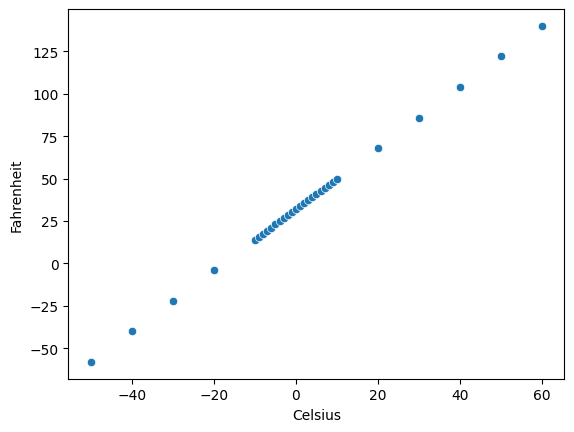

In [ ]:

# Assuming Temperature_df is your DataFrame
sns.scatterplot(x=Temperature_df['Celsius'], y=Temperature_df['Fahrenheit'])


In [ ]:
X_train = Temperature_df['Celsius']
y_train = Temperature_df['Fahrenheit']

from sklearn.model_selection import train_test_split

X_train_reshaped, X_test, y_train_reshaped, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train_reshaped, y_train_reshaped, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 398ms/step - loss: 4860.6860
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 3502.3699
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 2434.8506
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 1656.5375
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 1155.1589
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 902.8943
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 852.5838
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 938.6626
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 1086.3629
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 1227.5919
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 1315.3734
Epoch 12/100
1/1 [==============================] - 0s 11ms/step - loss: 1329.2773
Epoch 13/100
1/1 [=

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

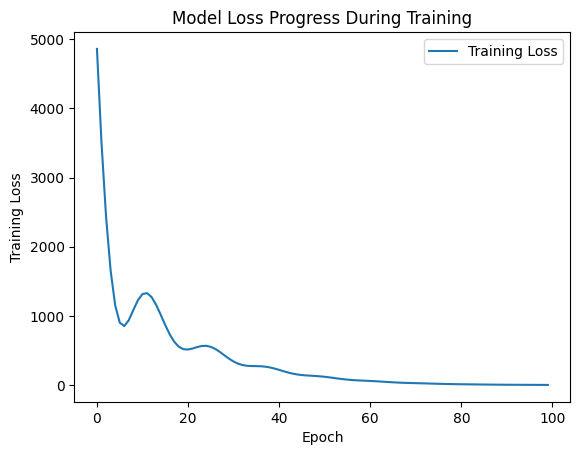

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()

[array([[1.8098493]], dtype=float32), array([30.819836], dtype=float32)]

In [ ]:
# Use the trained model to perform predictions

Temp_C = 0
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)


1/1 [==============================] - 0s 68ms/step
Temperature in degF Using Trained ANN = [[30.819836]]


In [ ]:
# Let's confirm this Using the equation:
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)


Temperature in degF Using Equation = 32.0


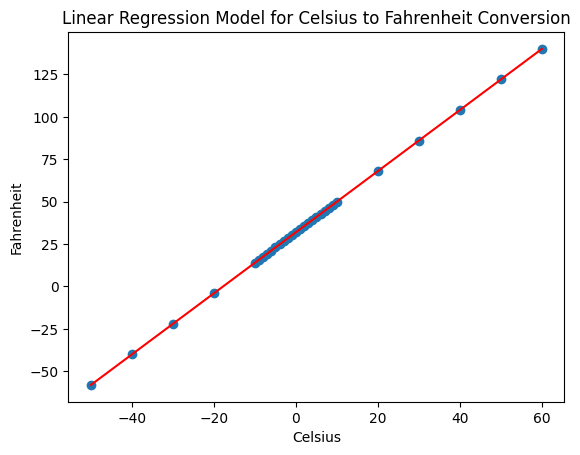

In [ ]:
# linear_model = LinearRegression()

# # Reshape X_train to a 2D array
# X_train_reshaped = X_train.values.reshape(-1, 1)

# # Train the linear regression model
# linear_model.fit(X_train_reshaped, y_train)

# # Predict Fahrenheit degrees using the linear regression model
# y_predicted = linear_model.predict(X_train_reshaped)

# # Plot the data points and the linear regression line
# plt.scatter(X_train, y_train)
# plt.plot(X_train, y_predicted, color='red')
# plt.xlabel('Celsius')
# plt.ylabel('Fahrenheit')
# plt.title('Linear Regression Model for Celsius to Fahrenheit Conversion')
# plt.show()